## Documentation

https://github.com/taurus-silver-17/Predisez-la-demande-en-electricite-#Scenario

## URL to get the data

https://eco2mix.rte-france.com/download/eco2mix/eCO2mix_RTE_energie_M.zip

## Library for the project

In [46]:
import os
import pandas as pd
import sklearn
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

## Load the data

In [47]:
electrecity_consomation = pd.read_csv('./data/consomation.csv', sep = ';')
electrecity_consomation.head(24)

,Mois,QualitÈ,Territoire,Production totale,Production nuclÈaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production Èolien,Production solaire,Production bioÈnergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,DonnÈes dÈfinitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,DonnÈes dÈfinitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,DonnÈes dÈfinitives,France,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,DonnÈes dÈfinitives,France,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,DonnÈes dÈfinitives,France,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
5,2012-06,DonnÈes dÈfinitives,France,37518,26562.0,2219,960.0,384,875,6823,994,483,437,33219,3648.0,5674.0,2026.0,447.0,482.0,1207.0,599.0,913.0
6,2012-07,DonnÈes dÈfinitives,France,37910,28818.0,2221,1110.0,437,674,4901,912,544,513,34141,3216.0,5327.0,2110.0,822.0,494.0,825.0,787.0,287.0
7,2012-08,DonnÈes dÈfinitives,France,36339,28314.0,2533,1165.0,413,956,3563,907,536,486,32247,3561.0,5834.0,2273.0,948.0,334.0,610.0,792.0,877.0
8,2012-09,DonnÈes dÈfinitives,France,38035,30130.0,2450,1382.0,396,671,3641,931,413,470,33269,4054.0,6036.0,1981.0,1011.0,72.0,790.0,1413.0,769.0
9,2012-10,DonnÈes dÈfinitives,France,42987,32848.0,3518,2039.0,456,1022,4534,1355,283,450,38628,3625.0,6387.0,2762.0,183.0,-273.0,1621.0,1774.0,321.0


## Select only France data

In [48]:
fr_electrecity_consomation = electrecity_consomation[electrecity_consomation['Territoire']=='France']
fr_electrecity_consomation.Territoire.value_counts()

France    118
Name: Territoire, dtype: int64

## Select only relevant columns for the analysis

In [49]:
fr_electrecity_consomation = fr_electrecity_consomation[['Mois', 'QualitÈ', 'Production totale', 'Consommation totale']]
fr_electrecity_consomation.head()

,Mois,QualitÈ,Production totale,Consommation totale
0,2012-01,DonnÈes dÈfinitives,57177,51086
1,2012-02,DonnÈes dÈfinitives,54419,54476
2,2012-03,DonnÈes dÈfinitives,48583,43156
3,2012-04,DonnÈes dÈfinitives,44192,40176
4,2012-05,DonnÈes dÈfinitives,40433,35257


## Explore and clean 'Qualite'

In [50]:
fr_electrecity_consomation['QualitÈ'].value_counts()

DonnÈes dÈfinitives    96
DonnÈes consolidÈes    22
Name: QualitÈ, dtype: int64

In [51]:
fr_electrecity_consomation[fr_electrecity_consomation['QualitÈ']=='DonnÈes dÈfinitives'].head()

,Mois,QualitÈ,Production totale,Consommation totale
0,2012-01,DonnÈes dÈfinitives,57177,51086
1,2012-02,DonnÈes dÈfinitives,54419,54476
2,2012-03,DonnÈes dÈfinitives,48583,43156
3,2012-04,DonnÈes dÈfinitives,44192,40176
4,2012-05,DonnÈes dÈfinitives,40433,35257


In [52]:
fr_electrecity_consomation[fr_electrecity_consomation['QualitÈ']=='DonnÈes consolidÈes'].head()

,Mois,QualitÈ,Production totale,Consommation totale
1110,2020-01,DonnÈes consolidÈes,54667,49676
1123,2020-02,DonnÈes consolidÈes,50756,43358
1136,2020-03,DonnÈes consolidÈes,48020,41486
1149,2020-04,DonnÈes consolidÈes,36883,30658
1162,2020-05,DonnÈes consolidÈes,37664,30622


## We only keep for the analysis the row where Qualite column is equal to 'DonnÈes dÈfinitives'

In [53]:
fr_definitive_electrecity_consomation = fr_electrecity_consomation[fr_electrecity_consomation['QualitÈ']=='DonnÈes dÈfinitives']
print(fr_definitive_electrecity_consomation.shape)

print(fr_electrecity_consomation['Mois'].min())
print(fr_electrecity_consomation['Mois'].max())


(96, 4)
2012-01
2021-10


In [54]:
fr_definitive_electrecity_consomation.head(24)

,Mois,QualitÈ,Production totale,Consommation totale
0,2012-01,DonnÈes dÈfinitives,57177,51086
1,2012-02,DonnÈes dÈfinitives,54419,54476
2,2012-03,DonnÈes dÈfinitives,48583,43156
3,2012-04,DonnÈes dÈfinitives,44192,40176
4,2012-05,DonnÈes dÈfinitives,40433,35257
5,2012-06,DonnÈes dÈfinitives,37518,33219
6,2012-07,DonnÈes dÈfinitives,37910,34141
7,2012-08,DonnÈes dÈfinitives,36339,32247
8,2012-09,DonnÈes dÈfinitives,38035,33269
9,2012-10,DonnÈes dÈfinitives,42987,38628


In [55]:
fr_definitive_electrecity_consomation['Mois']=pd.to_datetime(fr_definitive_electrecity_consomation["Mois"])
fr_definitive_electrecity_consomation = fr_definitive_electrecity_consomation.rename(columns={'Consommation totale': 'consommation_totale'})
fr_definitive_electrecity_consomation = fr_definitive_electrecity_consomation.rename(columns={'Mois': 'mois'})
print(fr_definitive_electrecity_consomation.info())
fr_definitive_electrecity_consomation.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 1097
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   mois                 96 non-null     datetime64[ns]
 1   QualitÈ              96 non-null     object        
 2   Production totale    96 non-null     int64         
 3   consommation_totale  96 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ KB
None


/var/folders/3x/hm8hmk5d5v71tnm88n9rfb8c0000gn/T/ipykernel_3090/1263629917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_definitive_electrecity_consomation['Mois']=pd.to_datetime(fr_definitive_electrecity_consomation["Mois"])


,mois,QualitÈ,Production totale,consommation_totale
0,2012-01-01,DonnÈes dÈfinitives,57177,51086
1,2012-02-01,DonnÈes dÈfinitives,54419,54476
2,2012-03-01,DonnÈes dÈfinitives,48583,43156
3,2012-04-01,DonnÈes dÈfinitives,44192,40176
4,2012-05-01,DonnÈes dÈfinitives,40433,35257


<AxesSubplot:xlabel='mois'>

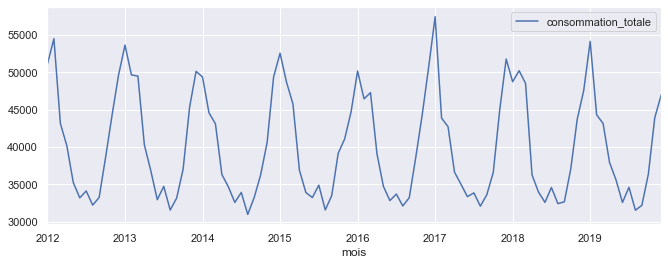

In [56]:
sns.set(rc={'figure.figsize':(11, 4)})
fr_definitive_electrecity_consomation.plot(y="consommation_totale",x='mois')